In [34]:
import pandas as pd
import numpy as np
import warnings
import pickle
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import chardet

with open('spotify-2023_melodize.csv', 'rb') as f:
    raw_data = f.read()
    encoding = chardet.detect(raw_data)['encoding']
    print(encoding)

utf-8


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('spotify-2023_melodize.csv', encoding = 'ISO-8859-1')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df

,Unnamed: 0,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,Major,60,24,39,57,0,8,3
949,949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6
950,950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,Major,80,81,67,4,0,8,6
951,951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5


In [8]:
df.to_csv('spotify-2023_melodize.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            953 non-null    int64 
 1   track_name            953 non-null    object
 2   artist_name           953 non-null    object
 3   artist_count          953 non-null    int64 
 4   released_year         953 non-null    int64 
 5   released_month        953 non-null    int64 
 6   released_day          953 non-null    int64 
 7   in_spotify_playlists  953 non-null    int64 
 8   in_spotify_charts     953 non-null    int64 
 9   streams               953 non-null    object
 10  bpm                   953 non-null    int64 
 11  key                   858 non-null    object
 12  mode                  953 non-null    object
 13  danceability          953 non-null    int64 
 14  valence               953 non-null    int64 
 15  energy                953 non-null    in

In [10]:
sns.set_theme(rc={"figure.figsize": (12, 9)})

<Axes: xlabel='bpm', ylabel='danceability'>

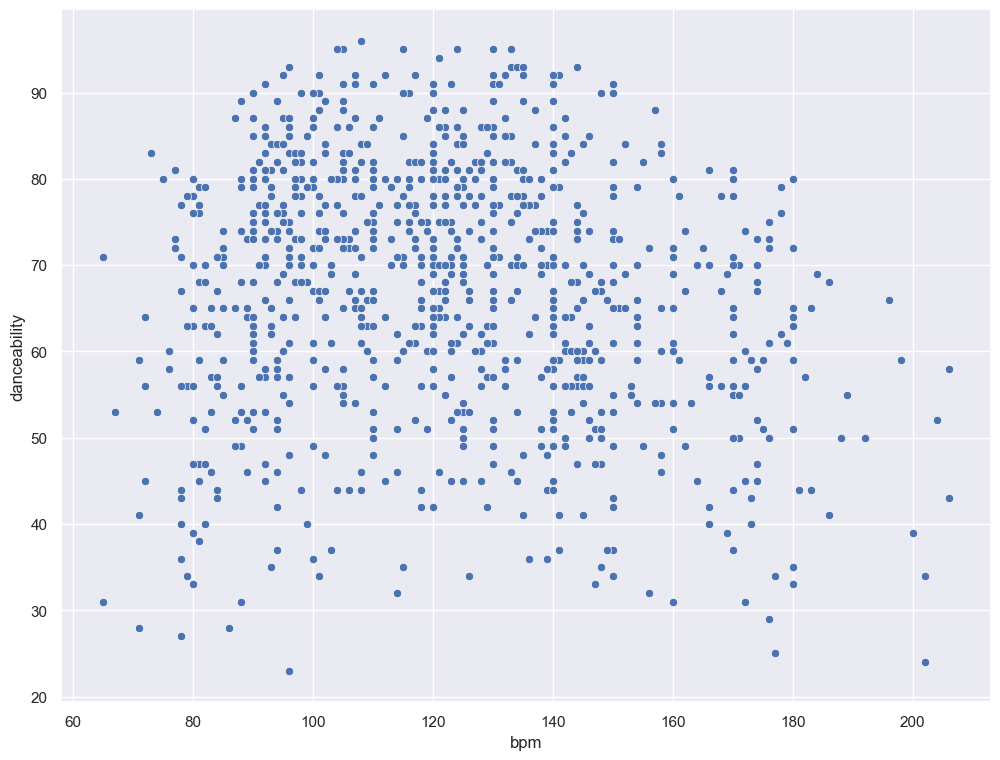

In [11]:
sns.scatterplot(x=df['bpm'], y=df['danceability'])

<html>
<head>
    <title>Song Danceability Analysis</title>
</head>
<body>
    <p>From this we learn that songs with most danceability lies between 110 to 120.</p>
</body>
</html>

In [12]:
df.head(5)

,Unnamed: 0,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6


In [13]:
df.isnull().sum()

Unnamed: 0               0
track_name               0
artist_name              0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
bpm                      0
key                     95
mode                     0
danceability             0
valence                  0
energy                   0
acousticness             0
instrumentalness         0
liveness                 0
speechiness              0
dtype: int64

In [14]:
df[df['key'].isnull()].head(5)

,Unnamed: 0,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
12,12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,118,NaN,Major,71,65,68,6,0,3,7
17,17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,78,NaN,Major,44,14,9,96,0,10,3
22,22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,135,NaN,Minor,48,44,42,12,2,11,3
35,35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,120,NaN,Major,81,63,68,11,0,11,4
44,44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,144,NaN,Major,77,75,58,52,0,23,25


In [15]:
df = df.replace([np.inf, -np.inf], np.nan)

<Axes: xlabel='in_spotify_playlists', ylabel='in_spotify_charts'>

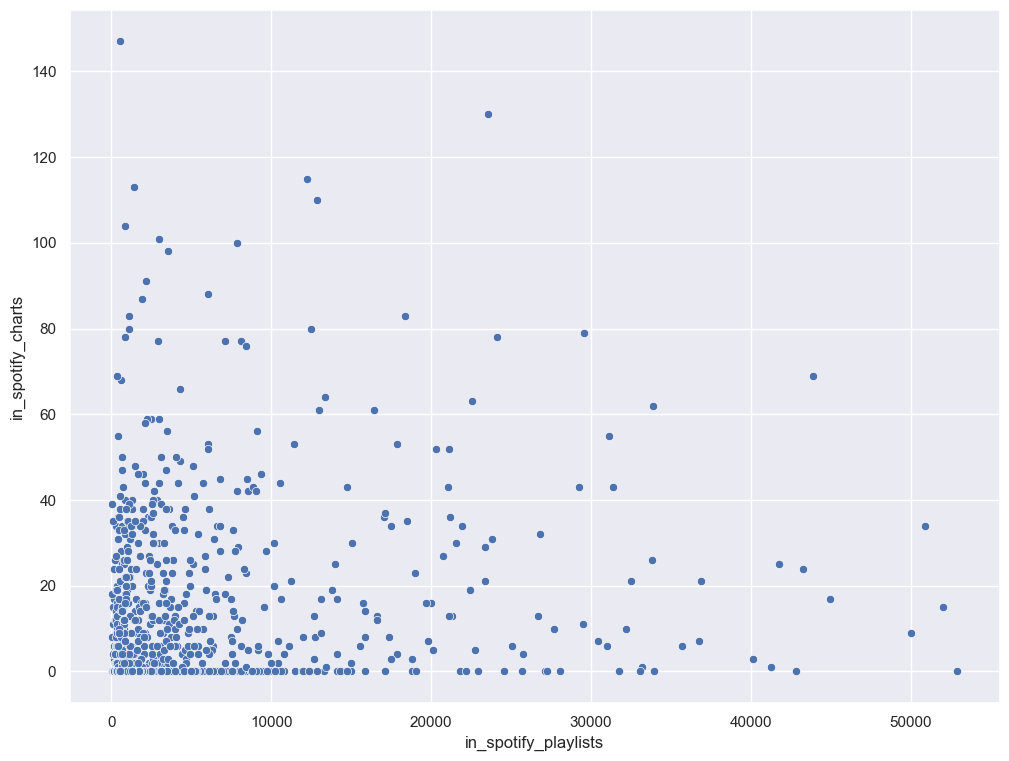

In [16]:
sns.scatterplot(x=df['in_spotify_playlists'], y=df['in_spotify_charts'])

In [17]:
num_col = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num_col.append(i)

In [18]:
num_col

['Unnamed: 0',
 'artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'bpm',
 'danceability',
 'valence',
 'energy',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness']

In [19]:
numeric_df = df.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [29]:
df

,Unnamed: 0,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,Cluster
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4,0
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4,0
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6,0
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15,0
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,Major,60,24,39,57,0,8,3,5
949,949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6,5
950,950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,Major,80,81,67,4,0,8,6,3
951,951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5,7


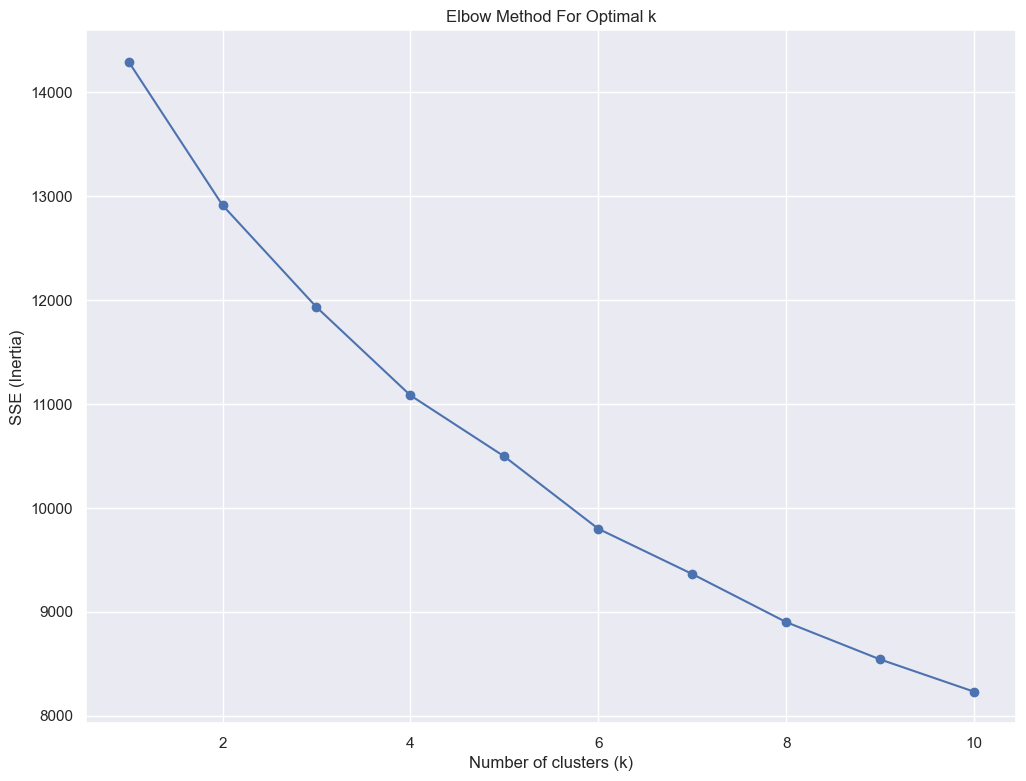

In [20]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
km = KMeans(n_clusters=10, random_state=42, n_init=10)

In [23]:
km.fit(scaled_data)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [27]:
df['Cluster'] = km.labels_

In [28]:
df.groupby('Cluster').mean(numeric_only=True)

,Unnamed: 0,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
Cluster,,,,,,,,,,,,,,,
0,96.127119,1.533898,2020.957627,5.830508,15.025424,5340.271186,49.788136,123.796610,70.093220,55.525424,69.288136,22.254237,0.533898,15.542373,8.008475
1,564.155172,1.247126,2020.586207,6.431034,11.965517,3029.695402,4.683908,125.655172,61.660920,33.913793,65.850575,13.252874,0.500000,15.517241,6.471264
2,476.774648,1.563380,2020.676056,5.732394,16.126761,3177.169014,7.549296,121.394366,65.535211,53.718310,74.239437,18.464789,0.070423,50.619718,8.422535
3,539.426316,1.405263,2020.710526,6.131579,17.821053,3307.768421,5.678947,118.342105,76.878947,72.752632,71.036842,20.284211,0.442105,14.436842,7.273684
4,486.615385,1.384615,1964.000000,4.461538,5.000000,7364.038462,0.538462,130.307692,56.653846,69.423077,53.615385,51.692308,0.153846,21.884615,4.076923
5,489.254098,1.147541,2020.204918,7.040984,13.852459,4199.918033,7.237705,119.713115,52.500000,32.737705,41.180328,70.622951,1.729508,15.926230,6.344262
6,530.764706,1.411765,2015.823529,6.529412,14.823529,3579.352941,9.823529,122.764706,60.352941,32.235294,58.647059,31.000000,57.411765,14.117647,5.411765
7,527.352941,3.720588,2021.500000,6.411765,14.205882,2630.044118,5.691176,118.382353,74.632353,59.632353,69.573529,17.764706,0.632353,17.294118,9.794118
8,402.559322,1.271186,2005.779661,3.271186,8.203390,29121.847458,17.338983,120.661017,64.033898,49.169492,68.661017,16.610169,0.406780,14.627119,7.881356


In [33]:
random_sample = df.sample(n=1, random_state=42)
print("Sampled Song:")
print(random_sample)

Sampled Song:
     Unnamed: 0  track_name artist_name  artist_count  released_year  \
199         199  Take On Me        a-ha             1           1984   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
199              10            19                 44927                 17   

        streams  bpm key   mode  danceability  valence  energy  acousticness  \
199  1479115056   84  F#  Minor            57       86      90             2   

     instrumentalness  liveness  speechiness  Cluster  
199                 0         9            5        8  


In [36]:
sample_numeric = random_sample.select_dtypes(include=np.number).drop(columns=['Cluster'])

sample_scaled = scaler.transform(sample_numeric)

predicted_cluster = km.predict(sample_scaled)[0]
print(f"This song belongs to cluster: {predicted_cluster}")

This song belongs to cluster: 8


In [ ]:
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(km, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
with open("kmeans_model.pkl", "rb") as f:
    loaded_kmeans = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

In [ ]:
new_cluster = loaded_kmeans.predict(loaded_scaler.transform(sample_numeric))